In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
from tkinter import *
from tkinter import messagebox
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.multiclass import OneVsRestClassifier

In [2]:
#Load CSV & Display it
data = pd.read_csv('Iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
iris_species    150
dtype: int64

In [4]:
#Checking for Null Values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
iris_species    0
dtype: int64

In [5]:
#Dropping NaN-Null Values
data = data.dropna(how='any',axis=0)
data

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Confusion Matrix and Accuracy

In [7]:
# Split data into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode the target variable into numerical labels
le = LabelEncoder()
y = le.fit_transform(y)

# Scaling the numeric variables
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test, sc

# Train a logistic regression model using OneVsRestClassifier
def train_lr(X_train, Y_train):
    lr = LogisticRegression(random_state=0)
    ovsr = OneVsRestClassifier(lr)
    ovsr.fit(X_train, Y_train.ravel())
    return ovsr

# Confusion Matrix and Accuracy
def confusion_accuracy(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

# Setosa Class
X_train, X_test, y_train, y_test, sc = split_data(X, y)
setosa_labels = (y_train == 0)
setosa_classifier = train_lr(X_train, setosa_labels)
setosa_pred = setosa_classifier.predict(X_test)
print('Setosa')
confusion_accuracy(y_test == 0, setosa_pred)

# Versicolor Class
X_train, X_test, y_train, y_test, sc = split_data(X, y)
versicolor_labels = (y_train == 1)
versicolor_classifier = train_lr(X_train, versicolor_labels)
versicolor_pred = versicolor_classifier.predict(X_test)
print('\nVersicolor')
confusion_accuracy(y_test == 1, versicolor_pred)

# Virginica Class
X_train, X_test, y_train, y_test, sc = split_data(X, y)
virginica_labels = (y_train == 2)
virginica_classifier = train_lr(X_train, virginica_labels)
virginica_pred = virginica_classifier.predict(X_test)
print('\nVirginica')
confusion_accuracy(y_test == 2, virginica_pred)

Setosa
Confusion Matrix:
[[25  0]
 [ 0 13]]
Accuracy of the model: 100.00%

Versicolor
Confusion Matrix:
[[21  1]
 [13  3]]
Accuracy of the model: 63.16%

Virginica
Confusion Matrix:
[[28  1]
 [ 0  9]]
Accuracy of the model: 97.37%


# Probability of each species

In [8]:
# Setosa Class
setosa_probabilities = setosa_classifier.predict_proba(X_test)

print('Setosa Probabilities:')
setosa_results = []

for i, prob in enumerate(setosa_probabilities):
    sample_info = {
        "Sample": i + 1,
        "Sepal Length": X_test[i][0],
        "Sepal Width": X_test[i][1],
        "Petal Length": X_test[i][2],
        "Petal Width": X_test[i][3],
        "Not Setosa Probability": prob[0],
        "Setosa Probability": prob[1],
        "Predicted Class": "Setosa" if prob[1] >= 0.5 else "Not Setosa"
    }
    setosa_results.append(sample_info)

setosa_data = pd.DataFrame(setosa_results)
print(setosa_data)

# Versicolor Class
versicolor_probabilities = versicolor_classifier.predict_proba(X_test)

print('\nVersicolor Probabilities:')
versicolor_results = []

for i, prob in enumerate(versicolor_probabilities):
    sample_info = {
        "Sample": i + 1,
        "Sepal Length": X_test[i][0],
        "Sepal Width": X_test[i][1],
        "Petal Length": X_test[i][2],
        "Petal Width": X_test[i][3],
        "Not Versicolor Probability": prob[0],
        "Versicolor Probability": prob[1],
        "Predicted Class": "Versicolor" if prob[1] >= 0.5 else "Not Versicolor"
    }
    versicolor_results.append(sample_info)

versicolor_data = pd.DataFrame(versicolor_results)
print(versicolor_data)

# Virginica Class
virginica_probabilities = virginica_classifier.predict_proba(X_test)

print('\nVirginica Probabilities:')
virginica_results = []

for i, prob in enumerate(virginica_probabilities):
    sample_info = {
        "Sample": i + 1,
        "Sepal Length": X_test[i][0],
        "Sepal Width": X_test[i][1],
        "Petal Length": X_test[i][2],
        "Petal Width": X_test[i][3],
        "Not Virginica Probability": prob[0],
        "Virginica Probability": prob[1],
        "Predicted Class": "Virginica" if prob[1] >= 0.5 else "Not Virginica"
    }
    virginica_results.append(sample_info)

virginica_data = pd.DataFrame(virginica_results)
print(virginica_data)

Setosa Probabilities:
    Sample  Sepal Length  Sepal Width  Petal Length  Petal Width  \
0        1     -0.099845    -0.579825      0.727180     1.511471   
1        2      0.130725    -1.961535      0.113560    -0.285335   
2        3     -0.445700     2.644166     -1.336815    -1.312081   
3        4      1.629430    -0.349540      1.396583     0.741412   
4        5     -1.022125     0.801885     -1.281032    -1.312081   
5        6      0.476580     0.571600      1.229232     1.639814   
6        7     -1.022125     1.032170     -1.392599    -1.183737   
7        8      0.937720     0.111030      0.504045     0.356382   
8        9      1.053005    -0.579825      0.559829     0.228038   
9       10      0.246010    -0.579825      0.113560     0.099695   
10      11      0.246010    -1.040395      1.006098     0.228038   
11      12      0.591865     0.341315      0.392478     0.356382   
12      13      0.246010    -0.579825      0.504045    -0.028648   
13      14      0.707150  

# Graphical Model of  how the selection of Logistic Regression works

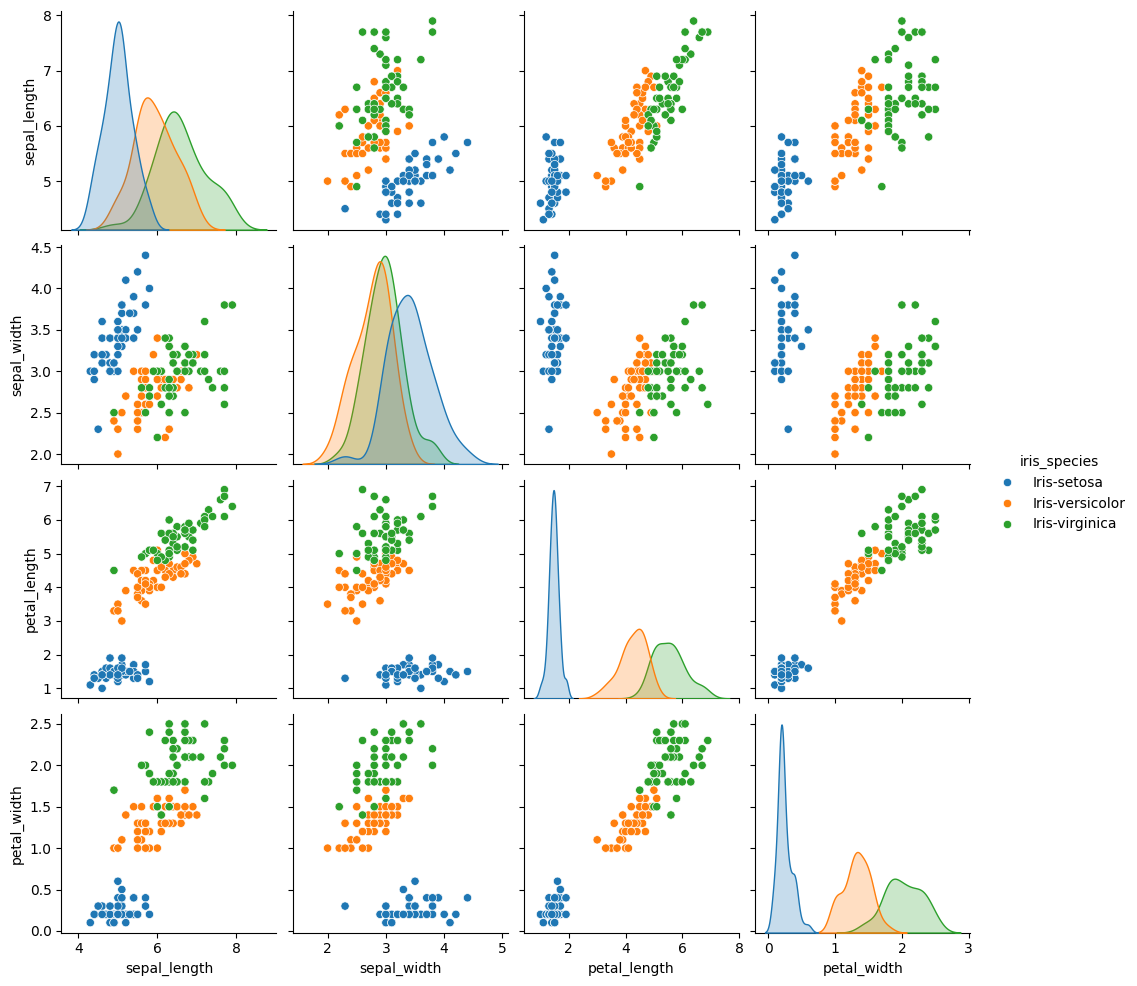

In [9]:
sns.pairplot(data, hue='iris_species')

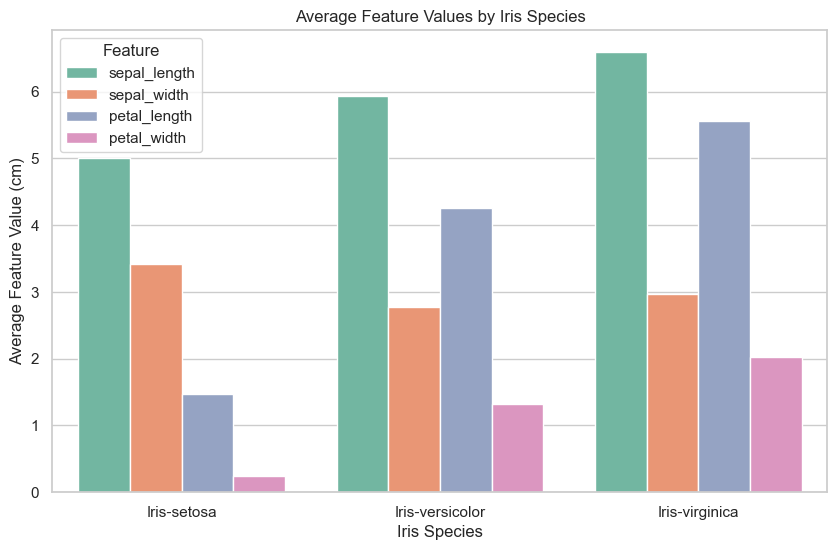

In [10]:
# Calculate average values by species for each feature
averages = data.groupby("iris_species").mean().reset_index()

# Melt the data for easier plotting
averages_melted = pd.melt(averages, id_vars="iris_species", var_name="feature")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x="iris_species", y="value", hue="feature", data=averages_melted, palette="Set2")

plt.xlabel("Iris Species")
plt.ylabel("Average Feature Value (cm)")
plt.title("Average Feature Values by Iris Species")
plt.legend(title="Feature", title_fontsize="12")
plt.show()

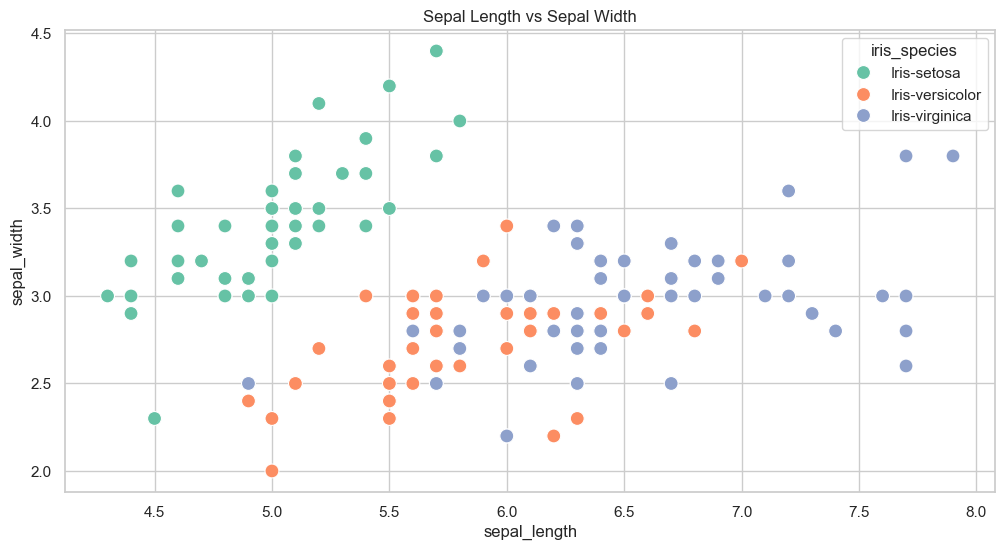

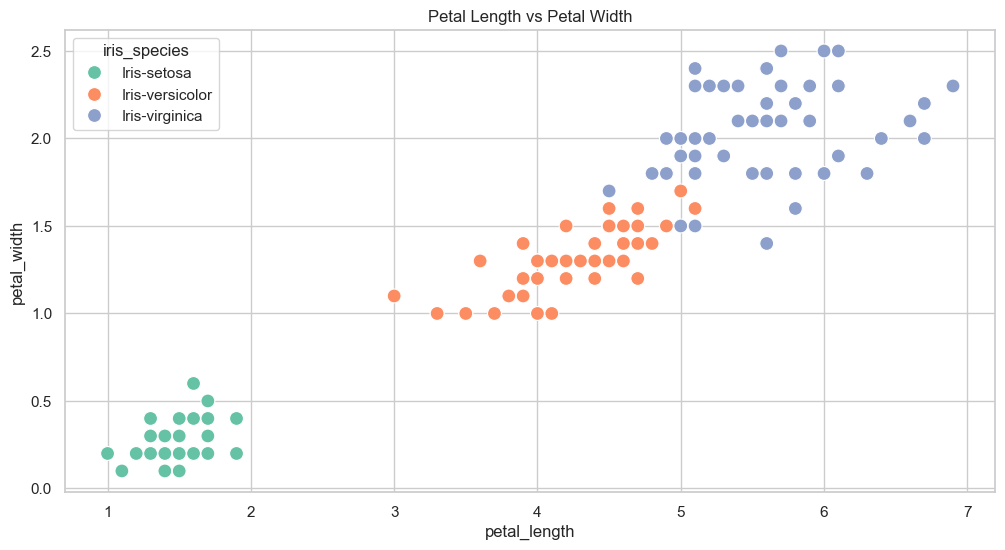

In [11]:
# Create scatter plots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Sepal Length vs Sepal Width
sns.scatterplot(data=data, x="sepal_length", y="sepal_width", hue="iris_species", palette="Set2", s=100)
plt.title("Sepal Length vs Sepal Width")

plt.figure(figsize=(12, 6))

# Petal Length vs Petal Width
sns.scatterplot(data=data, x="petal_length", y="petal_width", hue="iris_species", palette="Set2", s=100)
plt.title("Petal Length vs Petal Width")

plt.show()

# Interface / GUI Creation

In [13]:
app = Tk()
app.title('Iris Flower Species Prediction')
app.geometry('700x250')
font_style = ('Arial', 11, 'bold')
bg_color = '#4472c4'

def checkMaxMin(sepal_length, sepal_width, petal_length, petal_width):
    flag = True

    max_sepal_length = data['sepal_length'].max()
    min_sepal_length = data['sepal_length'].min()
    max_sepal_width = data['sepal_width'].max()
    min_sepal_width = data['sepal_width'].min()
    max_petal_length = data['petal_length'].max()
    min_petal_length = data['petal_length'].min()
    max_petal_width = data['petal_width'].max()
    min_petal_width = data['petal_width'].min()

    if not ((min_sepal_length <= sepal_length <= max_sepal_length)):
        flag = False
        messagebox.showerror('Error', f'Please enter a sepal length between {min_sepal_length} and {max_sepal_length}')

    if not ((min_sepal_width <= sepal_width <= max_sepal_width)):
        flag = False
        messagebox.showerror('Error', f'Please enter a sepal width between {min_sepal_width} and {max_sepal_width}')

    if not ((min_petal_length <= petal_length <= max_petal_length)):
        flag = False
        messagebox.showerror('Error', f'Please enter a petal length between {min_petal_length} and {max_petal_length}')

    if not ((min_petal_width <= petal_width <= max_petal_width)):
        flag = False
        messagebox.showerror('Error', f'Please enter a petal width between {min_petal_width} and {max_petal_width}')

    return flag

def submit():
    global sepal_length
    global sepal_width
    global petal_length
    global petal_width

    sepal_length = float(sepal_length_entry.get())
    sepal_width = float(sepal_width_entry.get())
    petal_length = float(petal_length_entry.get())
    petal_width = float(petal_width_entry.get())

    if checkMaxMin(sepal_length, sepal_width, petal_length, petal_width):
        setosa_prob = setosa_classifier.predict_proba(sc.transform([[sepal_length, sepal_width, petal_length, petal_width]]))[0][1]
        versicolor_prob = versicolor_classifier.predict_proba(sc.transform([[sepal_length, sepal_width, petal_length, petal_width]]))[0][1]
        virginica_prob = virginica_classifier.predict_proba(sc.transform([[sepal_length, sepal_width, petal_length, petal_width]]))[0][1]

        setosa_flag = False
        versicolor_flag = False
        virginica_flag = False

        maximum = max(setosa_prob, versicolor_prob, virginica_prob)
        if maximum == setosa_prob:
            prediction = "Setosa"
            setosa_flag = True
            setosa_flag_label.config(text="TRUE")
        if maximum == versicolor_prob:
            prediction = "Versicolor"
            versicolor_flag = True
            versicolor_flag_label.config(text="TRUE")
        if maximum == virginica_prob:
            prediction = "Virginica"
            virginica_flag = True
            virginica_flag_label.config(text="TRUE")

        if setosa_flag:
            flower_label.config(text="The species is SETOSA")
        if versicolor_flag:
            if not setosa_flag:
                flower_label.config(text="The species is VERSICOLOR")
            else:
                flower_label.config(text="The species is SETOSA and VERSICOLOR")
        if virginica_flag:
            if not setosa_flag and not versicolor_flag:
                flower_label.config(text="The species is VIRGINICA")
            else:
                if setosa_flag:
                    flower_label.config(text="The species is SETOSA and VIRGINICA")
                elif versicolor_flag:
                    flower_label.config(text="The species is VERSICOLOR and VIRGINICA")

        if not setosa_flag and not versicolor_flag and not virginica_flag:
            flower_label.config(text="No species")
            
sepal_length_label = Label(app, text='Sepal Length', font=font_style)
sepal_length_label.grid(row=0, column=0, sticky=W)
sepal_length_entry = Entry(app)
sepal_length_entry.grid(row=0, column=1)

sepal_width_label = Label(app, text='Sepal Width', font=font_style)
sepal_width_label.grid(row=1, column=0, sticky=W)
sepal_width_entry = Entry(app)
sepal_width_entry.grid(row=1, column=1)

petal_length_label = Label(app, text='Petal Length', font=font_style)
petal_length_label.grid(row=2, column=0, sticky=W)
petal_length_entry = Entry(app)
petal_length_entry.grid(row=2, column=1)

petal_width_label = Label(app, text='Petal Width', font=font_style)
petal_width_label.grid(row=3, column=0, sticky=W)
petal_width_entry = Entry(app)
petal_width_entry.grid(row=3, column=1)

submit_btn = Button(app, text='Submit', width=20, command=submit)
submit_btn.grid(row=4, column=1, pady=5)

species_label = Label(app, text='Iris Species', font=font_style)
species_label.grid(row=0, column=2, sticky=W, padx=20)

setosa_label = Label(app, text='Setosa', font=font_style, bg=bg_color, width=12)
setosa_label.grid(row=1, column=2, sticky=W, padx=5)

versicolor_label = Label(app, text='Versicolor', font=font_style, bg=bg_color, width=12)
versicolor_label.grid(row=1, column=3, sticky=W, padx=5)

virginica_label = Label(app, text='Virginica', font=font_style, bg=bg_color, width=12)
virginica_label.grid(row=1, column=4, sticky=W, padx=5)

setosa_flag_label = Label(app, text='FALSE', font=('Helvetica', 11), bg='#d0d6ea', width=12)
setosa_flag_label.grid(row=2, column=2, sticky=W, padx=5, pady=5)

versicolor_flag_label = Label(app, text='FALSE', font=('Helvetica', 11), bg='#d0d6ea', width=12)
versicolor_flag_label.grid(row=2, column=3, sticky=W, padx=5, pady=5)

virginica_flag_label = Label(app, text='FALSE', font=('Helvetica', 11), bg='#d0d6ea', width=12)
virginica_flag_label.grid(row=2, column=4, sticky=W, padx=5, pady=5)

flower_label = Label(app, text='No species', font=font_style)
flower_label.grid(row=4, column=2, columnspan=3, pady=(10, 0))

app.mainloop()
